In [4]:
#installed required libraries
!pip install requests pandas transformers torch matplotlib nltk


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [24]:
#fetched news

import requests
import pandas as pd
from datetime import datetime, timedelta

API_KEY = '5e142952b6074fe985ef0f12b5db4826'

def fetch_news(query, from_date, to_date, page=1):
    url = (f'https://newsapi.org/v2/everything?q={query}&from={from_date}&to={to_date}'
           f'&sortBy=relevancy&language=en&pageSize=100&page={page}&apiKey={API_KEY}')
    response = requests.get(url)
    data = response.json()


    if 'articles' in data:
        return data['articles']
    else:

        print(data)
        return []

# # fetch data for Trump and Biden
start_date = (datetime.now() - timedelta(days=30)).strftime('%Y-%m-%d')
end_date = datetime.now().strftime('%Y-%m-%d')
# start_date="07-06-2024"
# end_date="06-07-2024"
trump_articles = []
biden_articles = []

# Fetch Trump articles
for page in range(1, 2):
    articles = fetch_news('Trump', start_date, end_date, page)
    trump_articles.extend(articles)

# Fetch Biden articles
for page in range(1, 2):
    articles = fetch_news('Biden', start_date, end_date, page)
    biden_articles.extend(articles)

# Convert to DataFrame
trump_df = pd.DataFrame(trump_articles)
biden_df = pd.DataFrame(biden_articles)

# Save DataFrames to CSV files for later use
trump_df.to_csv('trump_articles.csv', index=False)
biden_df.to_csv('biden_articles.csv', index=False)


In [25]:
trump_df

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'wired', 'name': 'Wired'}",Angela Watercutter,The Trump Shooting Fueled an Online Sticker Ba...,After the attempted assassination of former pr...,https://www.wired.com/story/the-trump-shooting...,https://media.wired.com/photos/66998a589434aab...,2024-07-19T11:00:00Z,Ever since the assassination attempt on former...
1,"{'id': 'wired', 'name': 'Wired'}",Jason Parham,The Inevitability of Big Tech Backing Trump,"Silicon Valley, fueled by greed and acting in ...",https://www.wired.com/story/dial-up-jared-clem...,https://media.wired.com/photos/66998d07935538f...,2024-07-19T15:50:16Z,"It is true just about everywhere, but especial..."
2,"{'id': 'wired', 'name': 'Wired'}",Jessica Klein,Bitcoin Bros Go Wild for Donald Trump,"At Bitcoin 2024 conference in Nashville, Trump...",https://www.wired.com/story/bitcoin-bros-go-wi...,https://media.wired.com/photos/66a56f21bf2909f...,2024-07-28T12:43:07Z,Trumps speech is an hour behind. A half hour i...
3,"{'id': 'wired', 'name': 'Wired'}",David Gilbert,Supporters Believe ‘Hand Of God’ Saved Trump,"Lawmakers, influencers, and religious leaders ...",https://www.wired.com/story/supporters-believe...,https://media.wired.com/photos/6695b90772520f3...,2024-07-16T14:41:29Z,"GOD protected President Trump yesterday, House..."
4,"{'id': 'wired', 'name': 'Wired'}","Isabel Fraser, David Gilbert",Elon Musk Is All In On Endorsing Trump. His Ch...,"As Donald Trump calls for unity, Elon Musk’s “...",https://www.wired.com/story/elon-musk-is-all-i...,https://media.wired.com/photos/6696e8075278922...,2024-07-18T15:26:20Z,When Global Witness researchers asked Grok for...
...,...,...,...,...,...,...,...,...
95,"{'id': None, 'name': 'BBC News'}",None,Walz touts record and attacks Trump in first r...,Mr Walz tells Philadelphia rally that Republic...,https://www.bbc.com/news/articles/cx288w21y48o,https://ichef.bbci.co.uk/news/1024/branded_new...,2024-08-06T23:35:46Z,Watch key moments from first Harris-Walz campa...
96,"{'id': None, 'name': 'BBC News'}",None,Restrictions on Trump's Facebook and Instagram...,Meta lifts final restrictions and says US vote...,https://www.bbc.com/news/articles/c4ngj2x5638o,https://ichef.bbci.co.uk/news/1024/branded_new...,2024-07-13T09:05:04Z,Meta has lifted the final restrictions on Dona...
97,"{'id': None, 'name': 'BBC News'}",None,"Crime, immigration and tax cuts - Trump's spee...",The former president's speech contained plenty...,https://www.bbc.com/news/articles/cglk87d817zo,https://ichef.bbci.co.uk/news/1024/branded_new...,2024-07-19T09:19:49Z,"By Jake Horton, BBC Verify\r\nDonald Trump has..."
98,"{'id': None, 'name': 'Gizmodo.com'}",Lucas Ropek,RFK Jr. Suggests Sending People on Antidepress...,The unconventional presidential candidate has ...,https://gizmodo.com/rfk-jr-suggests-sending-pe...,https://gizmodo.com/app/uploads/2024/03/f4743b...,2024-07-25T17:40:27Z,It has recently been reported that RFK Jr. too...


In [26]:
biden_df

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'wired', 'name': 'Wired'}",Makena Kelly,Joe Biden Drops Out of 2024 Presidential Election,President Joe Biden announced Sunday that he w...,https://www.wired.com/story/joe-biden-drops-ou...,https://media.wired.com/photos/6685accfe1c85c0...,2024-07-21T18:12:46Z,President Joe Biden dropped out of the preside...
1,"{'id': 'wired', 'name': 'Wired'}",Makena Kelly,Silicon Valley Hasn’t Embraced Trump. But It’s...,Venture capitalists on both sides of the aisle...,https://www.wired.com/story/silicon-valley-cry...,https://media.wired.com/photos/668d715c9004df7...,2024-07-11T09:30:00Z,The June fundraiser set off alarm bells sugges...
2,"{'id': 'wired', 'name': 'Wired'}",Makena Kelly,Reid Hoffman Hasn't Given Up on Biden Just Yet,Some of the most prominent conservative ventur...,https://www.wired.com/story/joe-biden-silicon-...,https://media.wired.com/photos/668ee5fe3e17999...,2024-07-11T11:30:00Z,Reid. Very much. A lot of people are following...
3,"{'id': 'wired', 'name': 'Wired'}",David Gilbert,Trump Shooting Conspiracies Are Coming From Ev...,From Republican lawmakers claiming Biden order...,https://www.wired.com/story/trump-shooting-ass...,https://media.wired.com/photos/66931bb1898173c...,2024-07-14T16:04:20Z,"Alex Jones, the school shooting conspiracist, ..."
4,"{'id': 'wired', 'name': 'Wired'}","Makena Kelly, Lauren Goode",Silicon Valley Donors Bailed on Biden. Kamala ...,Now that President Joe Biden has dropped out o...,https://www.wired.com/story/bidens-out-silicon...,https://media.wired.com/photos/669d89967e73722...,2024-07-22T12:31:17Z,Hours after President Joe Biden announced that...
...,...,...,...,...,...,...,...,...
95,"{'id': None, 'name': 'NPR'}",Tamara Keith,Biden's brand was overcoming obstacles. But th...,President Biden had made a career of digging i...,https://www.npr.org/2024/07/04/nx-s1-5029515/b...,https://npr.brightspotcdn.com/dims3/default/st...,2024-07-23T10:00:00Z,When President Biden announced he was giving u...
96,"{'id': None, 'name': 'NPR'}",Scott Simon,Week in politics: Trump on Harris' biracial id...,Former President Donald Trump questions Vice P...,https://www.npr.org/2024/08/03/nx-s1-5060211/w...,https://media.npr.org/include/images/facebook-...,2024-08-03T12:23:36Z,Former President Donald Trump questions Vice P...
97,"{'id': None, 'name': 'NPR'}",Domenico Montanaro,What NPR's poll says about the state of Biden'...,President Biden doubled down on his decision t...,https://www.npr.org/2024/07/12/nx-s1-5036520/w...,https://media.npr.org/include/images/facebook-...,2024-07-12T21:49:54Z,President Biden doubled down on his decision t...
98,"{'id': None, 'name': 'NPR'}",Hadeel Al-Shalchi,The Pentagon plans to reinstall the floating p...,The pier will be used to deliver long-stalled ...,https://www.npr.org/2024/07/10/nx-s1-5034812/t...,https://media.npr.org/include/images/facebook-...,2024-07-10T09:03:04Z,The pier will be used to deliver long-stalled ...


In [27]:
trump_df = trump_df.sort_values(by='publishedAt', ascending=True)
biden_df = biden_df.sort_values(by='publishedAt', ascending=True)

In [28]:
trump_df.dropna(inplace=True)
biden_df.dropna(inplace=True)

In [29]:
biden_df.shape

(76, 8)

In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('punkt')
nltk.download('stopwords')

# Function to clean and preprocess text
def preprocess_text(text):
    # Remove URLs and special characters
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Convert to lower case and remove stop words
    tokens = [word.lower() for word in tokens if word.lower() not in stopwords.words('english')]

    # Join tokens back to string
    text = ' '.join(tokens)

    return text

# Apply preprocessing to Trump and Biden articles
trump_df['cleaned_content'] = trump_df['content'].apply(lambda x: preprocess_text(str(x)))
biden_df['cleaned_content'] = biden_df['content'].apply(lambda x: preprocess_text(str(x)))

# Save cleaned data for future use
trump_df.to_csv('cleaned_trump_articles.csv', index=False)
biden_df.to_csv('cleaned_biden_articles.csv', index=False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(62, 9)

In [31]:




from transformers import pipeline
import nltk
import pandas as pd
nltk.download('punkt')
from nltk import sent_tokenize

# Load your cleaned data
trump_df = pd.read_csv('cleaned_trump_articles.csv')
biden_df = pd.read_csv('cleaned_biden_articles.csv')

# Initialize sentiment analysis pipeline
sentiment_analyzer = pipeline('sentiment-analysis')

# Function to analyze sentiment sentence by sentence
def analyze_sentiment_per_sentence(text):
    sentences = sent_tokenize(text)
    sentiment_scores = []
    for sentence in sentences:
        result = sentiment_analyzer(sentence[:512])  # Truncate to 512 tokens if necessary
        sentiment_scores.append(result[0]['score'] if result[0]['label'] == 'POSITIVE' else -result[0]['score'])
    return sentiment_scores

# Apply sentence-level sentiment analysis to the cleaned content
trump_df['sentiment_scores'] = trump_df['cleaned_content'].apply(lambda x: analyze_sentiment_per_sentence(x))
biden_df['sentiment_scores'] = biden_df['cleaned_content'].apply(lambda x: analyze_sentiment_per_sentence(x))

# Example: Access the sentiment scores for the first article
print(trump_df['sentiment_scores'].iloc[0])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[-0.996013879776001]


In [32]:
trump_df['sentiment_scores']

,sentiment_scores
0,[-0.996013879776001]
1,[-0.993963897228241]
2,[-0.9871805310249329]
3,[0.8908959627151489]
4,[-0.970535933971405]
...,...
57,[-0.9687561988830566]
58,[-0.9913626313209534]
59,[-0.996366024017334]
60,[-0.9995545744895935]


In [20]:
# biden_df['sentiment_scores'].value_counts()

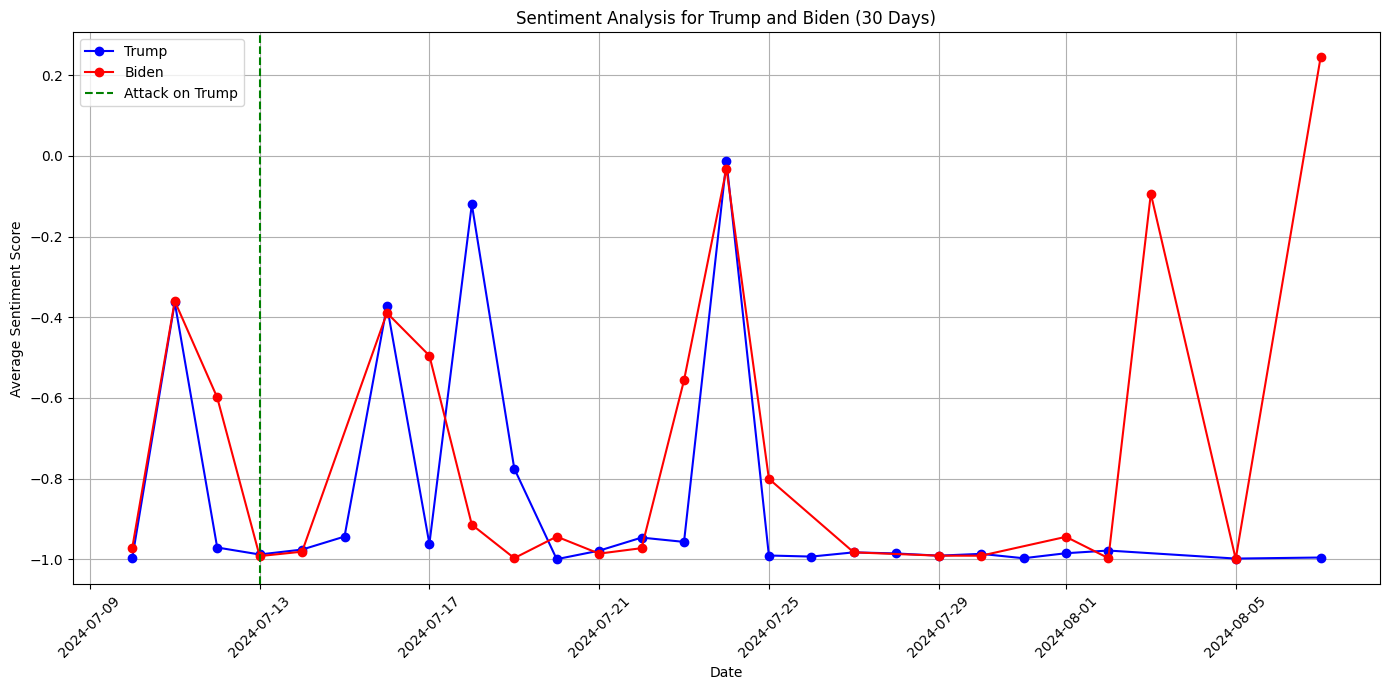

In [33]:
 #Calculate the average sentiment for each article
import numpy as np
trump_df['average_sentiment'] = trump_df['sentiment_scores'].apply(np.mean)
biden_df['average_sentiment'] = biden_df['sentiment_scores'].apply(np.mean)

# Convert the 'publishedAt' column to datetime format
trump_df['publishedAt'] = pd.to_datetime(trump_df['publishedAt'])
biden_df['publishedAt'] = pd.to_datetime(biden_df['publishedAt'])

# Aggregate sentiment by date
trump_sentiment_daily = trump_df.groupby(trump_df['publishedAt'].dt.date)['average_sentiment'].mean()
biden_sentiment_daily = biden_df.groupby(biden_df['publishedAt'].dt.date)['average_sentiment'].mean()

# Step 5: Visualize sentiment trends
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot Trump sentiment
plt.plot(trump_sentiment_daily.index, trump_sentiment_daily.values, label='Trump', color='blue', marker='o')

# Plot Biden sentiment
plt.plot(biden_sentiment_daily.index, biden_sentiment_daily.values, label='Biden', color='red', marker='o')

# Highlight the attack date
plt.axvline(x=pd.to_datetime('2024-07-13').date(), color='green', linestyle='--', label='Attack on Trump')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Analysis for Trump and Biden (30 Days)')
plt.legend()

# Rotate date labels
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [73]:
import pandas as pd
from transformers import pipeline

# Load your cleaned data
trump_df = pd.read_csv('cleaned_trump_articles.csv')
biden_df = pd.read_csv('cleaned_biden_articles.csv')

# Initialize sentiment analysis pipeline
sentiment_analyzer = pipeline('sentiment-analysis')

# Function to analyze sentiment
def analyze_sentiment(text):
    result = sentiment_analyzer(text[:512])  # BERT has a token limit, so we truncate text
    return result[0]['label']

# Apply sentiment analysis to the cleaned text
trump_df['sentiment'] = trump_df['cleaned_content'].apply(lambda x: analyze_sentiment(x))
biden_df['sentiment'] = biden_df['cleaned_content'].apply(lambda x: analyze_sentiment(x))

# Map sentiment labels to numerical values
label_mapping = {'NEGATIVE': -1, 'NEUTRAL': 0, 'POSITIVE': 1}
trump_df['sentiment'] = trump_df['sentiment'].map(label_mapping)
biden_df['sentiment'] = biden_df['sentiment'].map(label_mapping)

# Save labeled data
trump_df.to_csv('labeled_trump_articles.csv', index=False)
biden_df.to_csv('labeled_biden_articles.csv', index=False)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [74]:
trump_df

,source,author,title,description,url,urlToImage,publishedAt,content,cleaned_content,sentiment
0,"{'id': None, 'name': '[Removed]'}",NaN,[Removed],[Removed],https://removed.com,NaN,1970-01-01T00:00:00Z,[Removed],removed,-1
1,"{'id': None, 'name': 'BBC News'}",NaN,"As Keir Starmer heads to the US, Labour readie...",If Donald Trump returns to the White House the...,https://www.bbc.com/news/articles/cn05yyn941qo,https://ichef.bbci.co.uk/news/1024/branded_new...,2024-07-09T14:50:54Z,When it comes to Britains relationship with th...,comes britains relationship united states new ...,-1
2,"{'id': 'wired', 'name': 'Wired'}",David Gilbert,How Disinformation From a Russian AI Spam Farm...,A fake article about Zelensky's wife buying a ...,https://www.wired.com/story/ai-generated-russi...,https://media.wired.com/photos/668d518cce88c8f...,2024-07-09T15:51:57Z,"In the space of 24 hours, a piece of Russian d...",space 24 hours piece russian disinformation uk...,-1
3,"{'id': None, 'name': 'Gizmodo.com'}",Matt Novak,Trump Threatens Mark Zuckerberg With Prison In...,The former president has previously suggested ...,https://gizmodo.com/trump-threatens-mark-zucke...,https://gizmodo.com/app/uploads/2024/07/trump-...,2024-07-09T17:15:36Z,Donald Trump threatened to put “election fraud...,donald trump threatened put election fraudster...,-1
4,"{'id': None, 'name': 'Gizmodo.com'}",Matt Novak,U.S. Sailor Caught Trying to Access Joe Biden’...,The sailor tried multiple times but gained acc...,https://gizmodo.com/u-s-sailor-caught-trying-t...,https://gizmodo.com/app/uploads/2024/07/GettyI...,2024-07-09T19:00:49Z,A sailor in the U.S. Navy has been reportedly ...,sailor us navy reportedly disciplined allegedl...,-1
...,...,...,...,...,...,...,...,...,...,...
95,"{'id': None, 'name': 'Gizmodo.com'}",Matt Novak,Trump Launches Truth+ Streaming Service for Yo...,Truth+ will finally give the worst people on t...,https://gizmodo.com/trump-launches-truth-strea...,https://gizmodo.com/app/uploads/2024/08/Donald...,2024-08-02T19:35:51Z,"Donald Trump’s media company, known as Trump M...",donald trumps media company known trump media ...,-1
96,"{'id': 'the-verge', 'name': 'The Verge'}",Nilay Patel,Donald Trump says Google ‘has to be careful’ o...,Donald Trump saying Google would be shut down ...,https://www.theverge.com/2024/8/5/24212296/tru...,https://cdn.vox-cdn.com/thumbor/YEbFD2ADJ6SYQT...,2024-08-05T14:57:26Z,Image: Cath Virginia / The Verge; Getty Images...,image cath virginia verge getty images verge w...,-1
97,"{'id': None, 'name': 'Gizmodo.com'}",Lucas Ropek,This Could Be the Beginning of the End of Trum...,The Donald chose the wrong time to get into web3.,https://gizmodo.com/this-could-be-the-beginnin...,https://gizmodo.com/app/uploads/2024/08/Trump_...,2024-08-05T21:35:52Z,Donald Trump’s honeymoon with the cryptocurren...,donald trumps honeymoon cryptocurrency industr...,-1
98,"{'id': None, 'name': 'BBC News'}",NaN,Walz touts record and attacks Trump in first r...,Mr Walz tells Philadelphia rally that Republic...,https://www.bbc.com/news/articles/cx288w21y48o,https://ichef.bbci.co.uk/news/1024/branded_new...,2024-08-06T23:35:46Z,Watch key moments from first Harris-Walz campa...,watch key moments first harriswalz campaign ra...,-1


In [66]:
biden_df['sentiment'].value_counts()

,count
sentiment,
-1,87
1,13


In [67]:
trump_df['sentiment'].value_counts()

,count
sentiment,
-1,89
1,11


In [72]:
trump_df.iloc[2,8]

'space 24 hours piece russian disinformation ukrainian president volodymyr zelenskys wife buying bugatti car american aid money traveled warp speed across internet 2781 chars'

In [93]:




from transformers import pipeline
import nltk
import pandas as pd
nltk.download('punkt')
from nltk import sent_tokenize

# Load your cleaned data
trump_df = pd.read_csv('cleaned_trump_articles.csv')
biden_df = pd.read_csv('cleaned_biden_articles.csv')

# Initialize sentiment analysis pipeline
sentiment_analyzer = pipeline('sentiment-analysis')

# Function to analyze sentiment sentence by sentence
def analyze_sentiment_per_sentence(text):
    sentences = sent_tokenize(text)
    sentiment_scores = []
    for sentence in sentences:
        result = sentiment_analyzer(sentence[:512])  # Truncate to 512 tokens if necessary
        sentiment_scores.append(result[0]['score'] if result[0]['label'] == 'POSITIVE' else -result[0]['score'])
    return sentiment_scores

# Apply sentence-level sentiment analysis to the cleaned content
trump_df['sentiment_scores'] = trump_df['cleaned_content'].apply(lambda x: analyze_sentiment_per_sentence(x))
biden_df['sentiment_scores'] = biden_df['cleaned_content'].apply(lambda x: analyze_sentiment_per_sentence(x))

# Example: Access the sentiment scores for the first article
print(trump_df['sentiment_scores'].iloc[0])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[-0.9885151982307434]


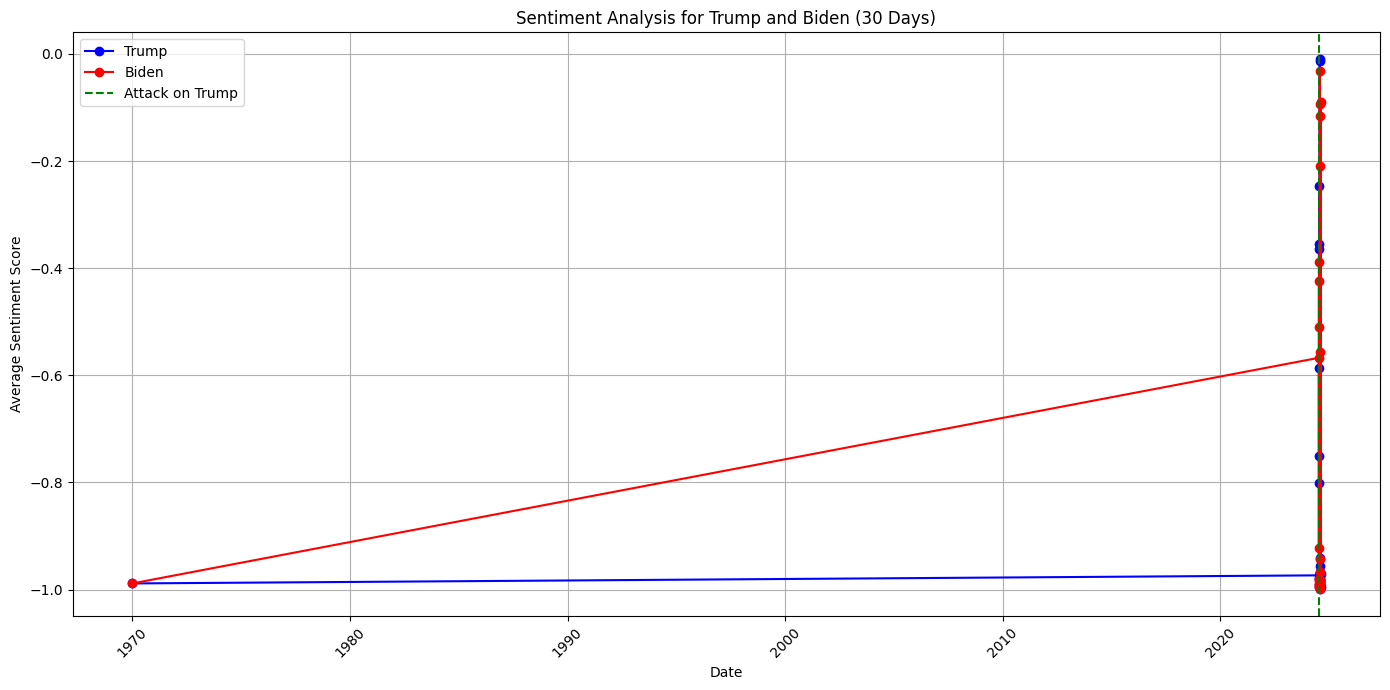

In [94]:
 #Calculate the average sentiment for each article
import numpy as np
trump_df['average_sentiment'] = trump_df['sentiment_scores'].apply(np.mean)
biden_df['average_sentiment'] = biden_df['sentiment_scores'].apply(np.mean)

# Convert the 'publishedAt' column to datetime format
trump_df['publishedAt'] = pd.to_datetime(trump_df['publishedAt'])
biden_df['publishedAt'] = pd.to_datetime(biden_df['publishedAt'])

# Aggregate sentiment by date
trump_sentiment_daily = trump_df.groupby(trump_df['publishedAt'].dt.date)['average_sentiment'].mean()
biden_sentiment_daily = biden_df.groupby(biden_df['publishedAt'].dt.date)['average_sentiment'].mean()

# Step 5: Visualize sentiment trends
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot Trump sentiment
plt.plot(trump_sentiment_daily.index, trump_sentiment_daily.values, label='Trump', color='blue', marker='o')

# Plot Biden sentiment
plt.plot(biden_sentiment_daily.index, biden_sentiment_daily.values, label='Biden', color='red', marker='o')

# Highlight the attack date
plt.axvline(x=pd.to_datetime('2024-07-13').date(), color='green', linestyle='--', label='Attack on Trump')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Analysis for Trump and Biden (30 Days)')
plt.legend()

# Rotate date labels
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

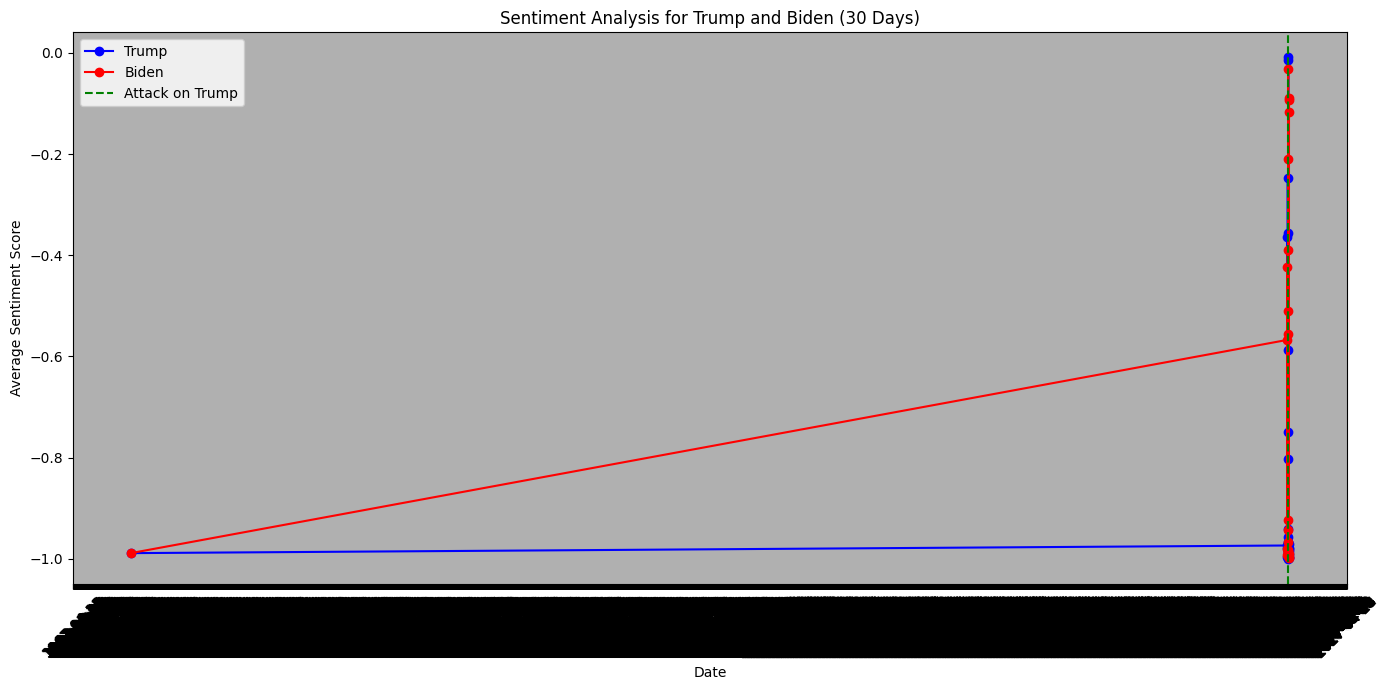

In [97]:
import matplotlib.dates as mdates

# Ensure dates are in the correct format and sorted
trump_sentiment_daily = trump_sentiment_daily.sort_index()
biden_sentiment_daily = biden_sentiment_daily.sort_index()

# Plotting the sentiment trends with correct date formatting and fluctuations
plt.figure(figsize=(14, 7))

# Plot Trump sentiment
plt.plot(trump_sentiment_daily.index, trump_sentiment_daily.values, label='Trump', color='blue', marker='o')

# Plot Biden sentiment
plt.plot(biden_sentiment_daily.index, biden_sentiment_daily.values, label='Biden', color='red', marker='o')

# Highlight the attack date
plt.axvline(x=pd.to_datetime('2024-07-13').date(), color='green', linestyle='--', label='Attack on Trump')

# Set the locator for the x-axis to show a tick every 3 days
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Analysis for Trump and Biden (30 Days)')
plt.legend()

# Add grid and show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [85]:
trump_df

,source,author,title,description,url,urlToImage,publishedAt,content,cleaned_content,sentiment_scores
0,"{'id': None, 'name': '[Removed]'}",NaN,[Removed],[Removed],https://removed.com,NaN,1970-01-01T00:00:00Z,[Removed],removed,[-0.9885151982307434]
1,"{'id': None, 'name': 'BBC News'}",NaN,"As Keir Starmer heads to the US, Labour readie...",If Donald Trump returns to the White House the...,https://www.bbc.com/news/articles/cn05yyn941qo,https://ichef.bbci.co.uk/news/1024/branded_new...,2024-07-09T14:50:54Z,When it comes to Britains relationship with th...,comes britains relationship united states new ...,[-0.9091544151306152]
2,"{'id': 'wired', 'name': 'Wired'}",David Gilbert,How Disinformation From a Russian AI Spam Farm...,A fake article about Zelensky's wife buying a ...,https://www.wired.com/story/ai-generated-russi...,https://media.wired.com/photos/668d518cce88c8f...,2024-07-09T15:51:57Z,"In the space of 24 hours, a piece of Russian d...",space 24 hours piece russian disinformation uk...,[-0.993513822555542]
3,"{'id': None, 'name': 'Gizmodo.com'}",Matt Novak,Trump Threatens Mark Zuckerberg With Prison In...,The former president has previously suggested ...,https://gizmodo.com/trump-threatens-mark-zucke...,https://gizmodo.com/app/uploads/2024/07/trump-...,2024-07-09T17:15:36Z,Donald Trump threatened to put “election fraud...,donald trump threatened put election fraudster...,[-0.9936158657073975]
4,"{'id': None, 'name': 'Gizmodo.com'}",Matt Novak,U.S. Sailor Caught Trying to Access Joe Biden’...,The sailor tried multiple times but gained acc...,https://gizmodo.com/u-s-sailor-caught-trying-t...,https://gizmodo.com/app/uploads/2024/07/GettyI...,2024-07-09T19:00:49Z,A sailor in the U.S. Navy has been reportedly ...,sailor us navy reportedly disciplined allegedl...,[-0.9973762035369873]
...,...,...,...,...,...,...,...,...,...,...
95,"{'id': None, 'name': 'Gizmodo.com'}",Matt Novak,Trump Launches Truth+ Streaming Service for Yo...,Truth+ will finally give the worst people on t...,https://gizmodo.com/trump-launches-truth-strea...,https://gizmodo.com/app/uploads/2024/08/Donald...,2024-08-02T19:35:51Z,"Donald Trump’s media company, known as Trump M...",donald trumps media company known trump media ...,[-0.9913626313209534]
96,"{'id': 'the-verge', 'name': 'The Verge'}",Nilay Patel,Donald Trump says Google ‘has to be careful’ o...,Donald Trump saying Google would be shut down ...,https://www.theverge.com/2024/8/5/24212296/tru...,https://cdn.vox-cdn.com/thumbor/YEbFD2ADJ6SYQT...,2024-08-05T14:57:26Z,Image: Cath Virginia / The Verge; Getty Images...,image cath virginia verge getty images verge w...,[-0.996366024017334]
97,"{'id': None, 'name': 'Gizmodo.com'}",Lucas Ropek,This Could Be the Beginning of the End of Trum...,The Donald chose the wrong time to get into web3.,https://gizmodo.com/this-could-be-the-beginnin...,https://gizmodo.com/app/uploads/2024/08/Trump_...,2024-08-05T21:35:52Z,Donald Trump’s honeymoon with the cryptocurren...,donald trumps honeymoon cryptocurrency industr...,[-0.9995545744895935]
98,"{'id': None, 'name': 'BBC News'}",NaN,Walz touts record and attacks Trump in first r...,Mr Walz tells Philadelphia rally that Republic...,https://www.bbc.com/news/articles/cx288w21y48o,https://ichef.bbci.co.uk/news/1024/branded_new...,2024-08-06T23:35:46Z,Watch key moments from first Harris-Walz campa...,watch key moments first harriswalz campaign ra...,[-0.9706332683563232]


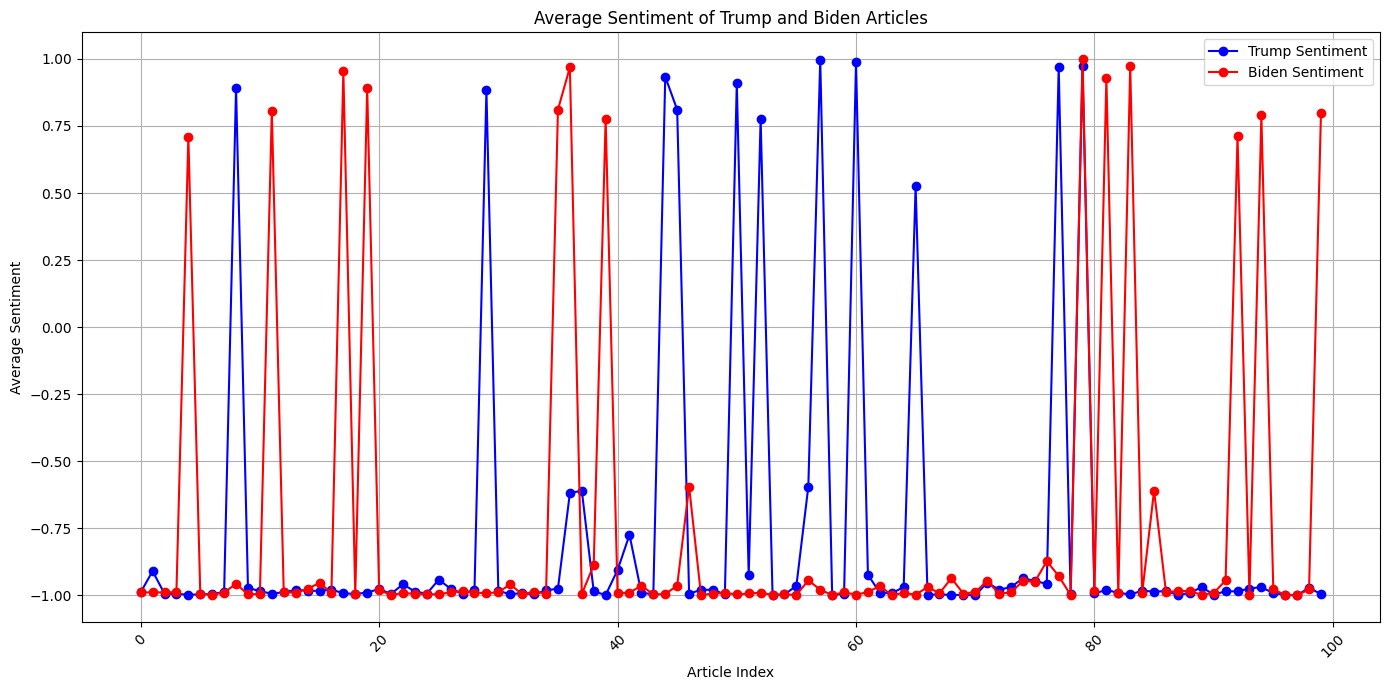

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume trump_df and biden_df are already populated with sentence-level sentiment scores.

# Function to calculate the average sentiment score for each article
def average_sentiment(sentiment_scores):
    return sum(sentiment_scores) / len(sentiment_scores) if len(sentiment_scores) > 0 else 0

# Apply the average sentiment function to each article
trump_df['average_sentiment'] = trump_df['sentiment_scores'].apply(average_sentiment)
biden_df['average_sentiment'] = biden_df['sentiment_scores'].apply(average_sentiment)

# Create a DataFrame to combine the sentiment scores
combined_df = pd.DataFrame({
    'Trump': trump_df['average_sentiment'],
    'Biden': biden_df['average_sentiment']
})

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(combined_df.index, combined_df['Trump'], label='Trump Sentiment', color='blue', marker='o')
plt.plot(combined_df.index, combined_df['Biden'], label='Biden Sentiment', color='red', marker='o')
plt.title('Average Sentiment of Trump and Biden Articles')
plt.xlabel('Article Index')
plt.ylabel('Average Sentiment')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data
trump_df = pd.read_csv('cleaned_trump_articles.csv')
biden_df = pd.read_csv('cleaned_biden_articles.csv')

# Ensure the 'publishedAt' column is in datetime format
trump_df['publishedAt'] = pd.to_datetime(trump_df['publishedAt'])
biden_df['publishedAt'] = pd.to_datetime(biden_df['publishedAt'])

# Function to calculate the average sentiment score for each date
def average_sentiment_per_date(df):
    # Group by date and calculate average sentiment
    return df.groupby(df['publishedAt'].dt.date)['sentiment_scores'].apply(lambda x: sum(x) / len(x)).reset_index()

# Apply the function to get average sentiment by date
trump_sentiment_by_date = average_sentiment_per_date(trump_df)
biden_sentiment_by_date = average_sentiment_per_date(biden_df)

# Rename columns for merging
trump_sentiment_by_date.columns = ['Date', 'Trump Sentiment']
biden_sentiment_by_date.columns = ['Date', 'Biden Sentiment']

# Merge the dataframes on 'Date'
combined_sentiment_by_date = pd.merge(trump_sentiment_by_date, biden_sentiment_by_date, on='Date', how='outer')

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(combined_sentiment_by_date['Date'], combined_sentiment_by_date['Trump Sentiment'], label='Trump Sentiment', color='blue', marker='o')
plt.plot(combined_sentiment_by_date['Date'], combined_sentiment_by_date['Biden Sentiment'], label='Biden Sentiment', color='red', marker='o')
plt.title('Average Sentiment of Trump and Biden Articles by Date')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'Column not found: sentiment_scores'

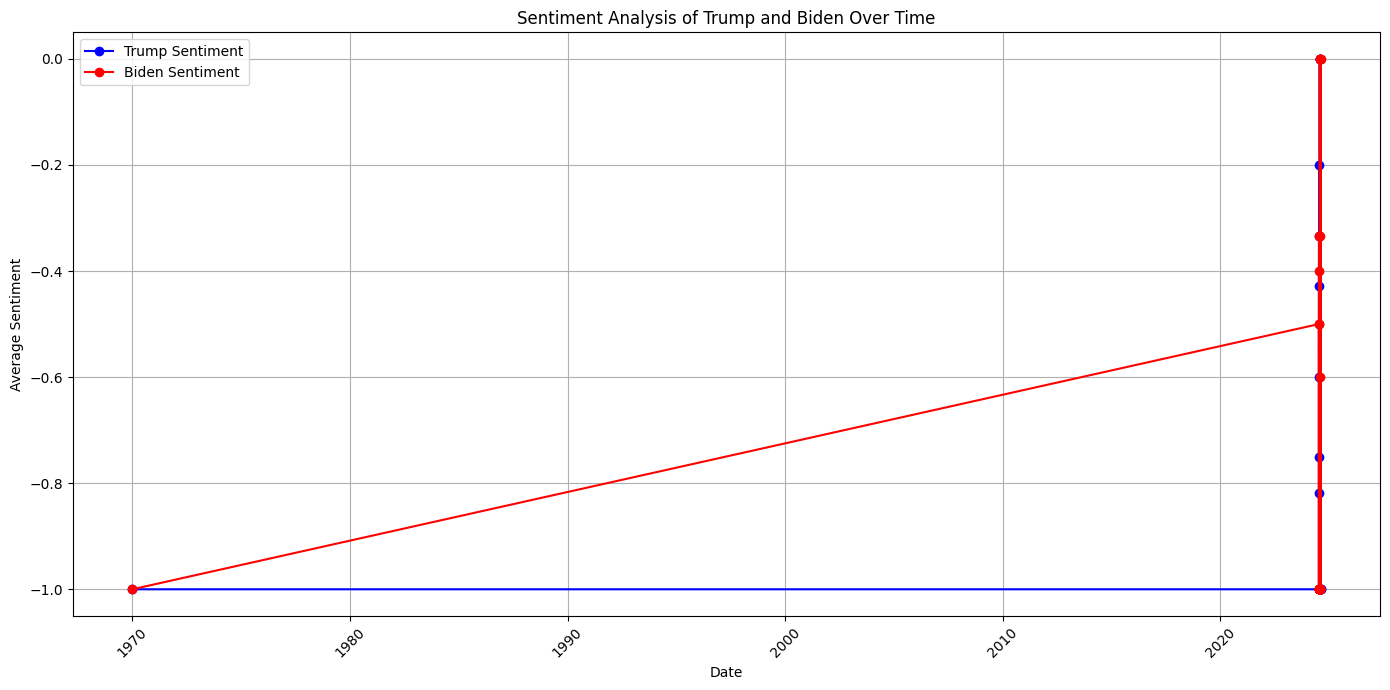

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the labeled data
trump_df = pd.read_csv('labeled_trump_articles.csv')
biden_df = pd.read_csv('labeled_biden_articles.csv')

# Ensure the 'publishedAt' column is datetime format
trump_df['publishedAt'] = pd.to_datetime(trump_df['publishedAt'])
biden_df['publishedAt'] = pd.to_datetime(biden_df['publishedAt'])

# Aggregate sentiment by date for both Trump and Biden
trump_sentiment = trump_df.groupby(trump_df['publishedAt'].dt.date)['sentiment'].mean()
biden_sentiment = biden_df.groupby(biden_df['publishedAt'].dt.date)['sentiment'].mean()

# Create a DataFrame for plotting
combined_df = pd.DataFrame({
    'Trump Sentiment': trump_sentiment,
    'Biden Sentiment': biden_sentiment
}).reset_index()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(combined_df['publishedAt'], combined_df['Trump Sentiment'], label='Trump Sentiment', color='blue', marker='o')
plt.plot(combined_df['publishedAt'], combined_df['Biden Sentiment'], label='Biden Sentiment', color='red', marker='o')
plt.title('Sentiment Analysis of Trump and Biden Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [79]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


In [81]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
import pandas as pd
nltk.download('punkt')
from nltk import sent_tokenize

# Load your cleaned data
trump_df = pd.read_csv('cleaned_trump_articles.csv')
biden_df = pd.read_csv('cleaned_biden_articles.csv')

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment sentence by sentence
def analyze_sentiment_per_sentence(text):
    sentences = sent_tokenize(text)
    sentiment_scores = []
    for sentence in sentences:
        score = analyzer.polarity_scores(sentence)['compound']
        sentiment_scores.append(score)
    return sentiment_scores

# Apply sentence-level sentiment analysis to the cleaned content
trump_df['sentiment_scores'] = trump_df['cleaned_content'].apply(lambda x: analyze_sentiment_per_sentence(x))
biden_df['sentiment_scores'] = biden_df['cleaned_content'].apply(lambda x: analyze_sentiment_per_sentence(x))

# Example: Access the sentiment scores for the first article
print(trump_df['sentiment_scores'].iloc[0])


[0.0]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


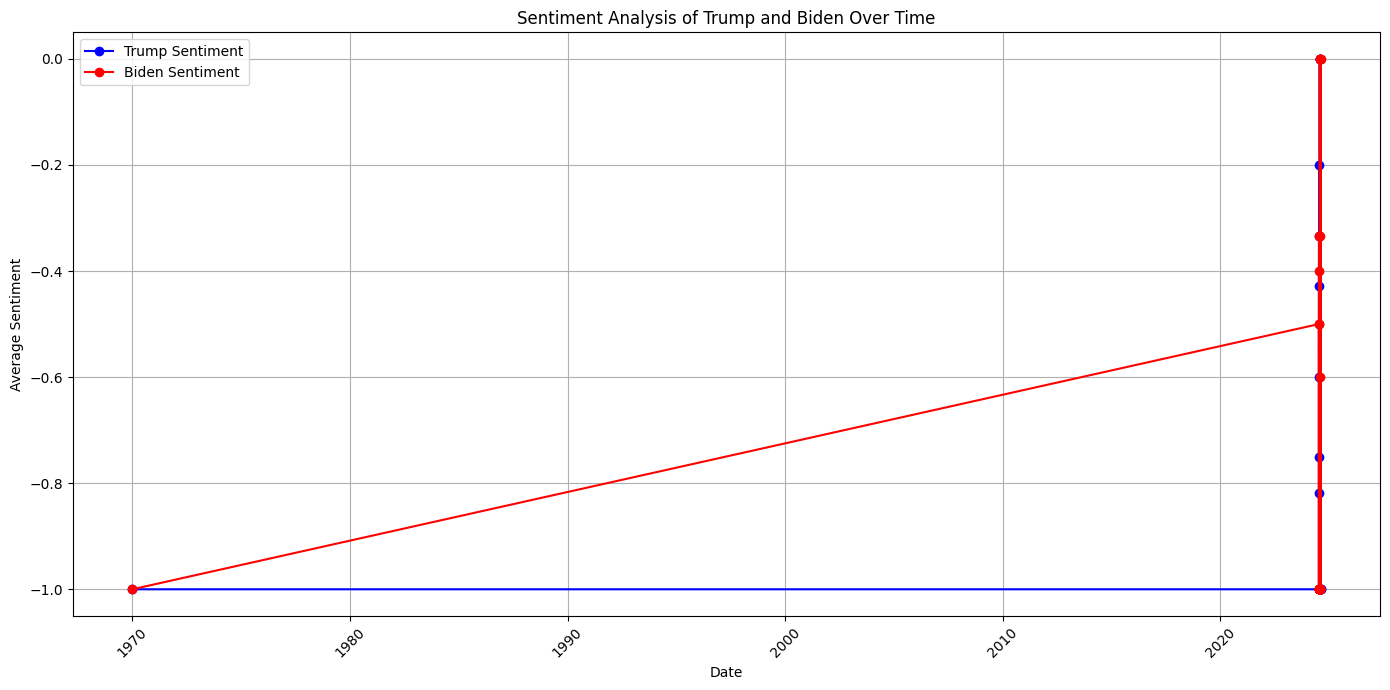

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the labeled data
trump_df = pd.read_csv('labeled_trump_articles.csv')
biden_df = pd.read_csv('labeled_biden_articles.csv')

# Ensure the 'publishedAt' column is datetime format
trump_df['publishedAt'] = pd.to_datetime(trump_df['publishedAt'])
biden_df['publishedAt'] = pd.to_datetime(biden_df['publishedAt'])

# Aggregate sentiment by date for both Trump and Biden
trump_sentiment = trump_df.groupby(trump_df['publishedAt'].dt.date)['sentiment'].mean()
biden_sentiment = biden_df.groupby(biden_df['publishedAt'].dt.date)['sentiment'].mean()

# Create a DataFrame for plotting
combined_df = pd.DataFrame({
    'Trump Sentiment': trump_sentiment,
    'Biden Sentiment': biden_sentiment
}).reset_index()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(combined_df['publishedAt'], combined_df['Trump Sentiment'], label='Trump Sentiment', color='blue', marker='o')
plt.plot(combined_df['publishedAt'], combined_df['Biden Sentiment'], label='Biden Sentiment', color='red', marker='o')
plt.title('Sentiment Analysis of Trump and Biden Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [46]:
train_trump=trump_df[:80]
train_biden=biden_df[:80]

In [45]:
train_trump.tail(1)

,source,author,title,description,url,urlToImage,publishedAt,content,cleaned_content,sentiment
59,"{'id': 'wired', 'name': 'Wired'}","Isabel Fraser, David Gilbert",Elon Musk Is All In On Endorsing Trump. His Ch...,"As Donald Trump calls for unity, Elon Musk’s “...",https://www.wired.com/story/elon-musk-is-all-i...,https://media.wired.com/photos/6696e8075278922...,2024-07-18T15:26:20Z,When Global Witness researchers asked Grok for...,global witness researchers asked grok list pre...,0


In [51]:
analyse_trump=trump_df[11:]
analyse_biden=biden_df[11:]

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
import torch
from sklearn.metrics import accuracy_score

#

# Combine datasets
df = pd.concat([train_trump, train_biden])
df = df[['source', 'publishedAt', 'cleaned_content', 'sentiment']]

# Convert 'publishedAt' to datetime
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Ensure sentiments are integers
df['sentiment'] = df['sentiment'].astype(int)

# Split the data
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['cleaned_content'].tolist(),
    df['sentiment'].tolist(),
    test_size=0.2,
    random_state=7
)

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the data
def tokenize_function(texts):
    return tokenizer(texts, padding=True, truncation=True, max_length=512, return_tensors='pt')

train_encodings = tokenize_function(train_texts)
val_encodings = tokenize_function(val_texts)

# Create Dataset class
class NewsDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_encodings, train_labels)
val_dataset = NewsDataset(val_encodings, val_labels)

# Load BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Define metrics computation function
def compute_metrics(p):
    preds = p.predictions.argmax(-1)
    return {'accuracy': accuracy_score(p.label_ids, preds)}

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# Fine-tune the model
trainer.train()

# Evaluate the model
eval_result = trainer.evaluate()
print(f"Validation Loss: {eval_result['eval_loss']}")
print(f"Validation Accuracy: {eval_result.get('eval_accuracy', 'Not computed')}")

# Save the model
model.save_pretrained('fine-tuned-bert')
tokenizer.save_pretrained('fine-tuned-bert')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-52-915e32259354>:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch,Training Loss,Validation Loss,Accuracy
1,1.004900,1.030882,0.656250
2,0.876900,0.931688,0.718750
3,0.740600,0.706958,0.718750
4,0.392300,0.837285,0.718750


<ipython-input-52-915e32259354>:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-52-915e32259354>:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-52-915e32259354>:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-52-915e32259354>:46: UserWarning: To copy construct fro

Validation Loss: 0.7069581151008606
Validation Accuracy: 0.71875


('fine-tuned-bert/tokenizer_config.json',
 'fine-tuned-bert/special_tokens_map.json',
 'fine-tuned-bert/vocab.txt',
 'fine-tuned-bert/added_tokens.json')

In [55]:
trainer.evaluate()

<ipython-input-52-915e32259354>:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'eval_loss': 0.7069581151008606,
 'eval_accuracy': 0.71875,
 'eval_runtime': 5.9935,
 'eval_samples_per_second': 5.339,
 'eval_steps_per_second': 0.334,
 'epoch': 4.0}

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load the model and tokenizer
model = BertForSequenceClassification.from_pretrained('/content/results/checkpoint-64')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# # Load your cleaned and labeled data
# trump_df = pd.read_csv('trump_sentiments.csv')
# biden_df = pd.read_csv('biden_sentiments.csv')

# # Combine datasets
# df = pd.concat([trump_df, biden_df])
# df = df[['source', 'publishedAt', 'cleaned_content', 'sentiment']]

# # Convert 'publishedAt' to datetime and ensure it's timezone-naive
# df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce').dt.tz_localize(None)

# # Drop rows where 'publishedAt' could not be parsed
# df = df.dropna(subset=['publishedAt'])

# Get the date for one month ago (timezone-naive)
# one_month_ago = datetime.now() - timedelta(days=30)

# # Filter the data for the last month
# df_last_month = df[df['publishedAt'] >= one_month_ago]

analyse_trump=trump_df[11:]
analyse_biden=biden_df[11:]

# Tokenize and encode data
def tokenize_function(texts):
    return tokenizer(texts, padding=True, truncation=True, max_length=512, return_tensors='pt')

# Prepare the data for predictions
test_encodings_trump= tokenize_function(analyse_trump['cleaned_content'].tolist())
test_labels_trump = analyse_trump['sentiment'].tolist()


test_encodings_biden= tokenize_function(analyse_biden['cleaned_content'].tolist())
test_labels_biden = analyse_biden['sentiment'].tolist()

# Predict sentiment using the fine-tuned model
def predict_sentiment(encodings):
    with torch.no_grad():
        outputs = model(**encodings)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1).tolist()
    return predictions

# Predict sentiments for the last month's data
predictions_trump = predict_sentiment(test_encodings_trump)
predictions_biden = predict_sentiment(test_encodings_biden)






In [62]:
# Ensure the model is in evaluation mode
model.eval()

# Print logits for a few samples
sample_logits = model(**test_encodings_trump).logits
print(sample_logits)

# Check class distribution
print(pd.Series(predictions_trump).value_counts())


tensor([[ 1.3550, -1.0692, -0.6122],
        [ 1.5439, -1.1197, -0.8203],
        [ 1.7099, -1.1106, -0.6459],
        [ 1.6770, -0.9727, -0.7606],
        [ 1.7627, -1.1165, -0.7920],
        [ 1.4308, -1.0796, -0.6306],
        [ 1.7101, -0.9787, -0.7255],
        [ 1.6269, -1.1447, -0.8332],
        [ 1.6649, -1.1032, -0.8662],
        [ 1.4405, -1.0912, -0.8169],
        [ 1.6227, -1.1796, -0.8177],
        [ 1.7118, -1.1235, -0.8139],
        [ 1.5706, -1.2147, -0.7508],
        [ 1.5783, -1.2415, -0.8282],
        [ 1.4491, -1.2177, -0.7908],
        [ 1.5993, -1.1114, -0.8547],
        [ 1.6157, -1.0884, -0.8714],
        [ 1.6288, -1.1517, -0.7915],
        [ 1.6645, -1.1858, -0.6747],
        [ 1.7113, -1.0366, -0.7871],
        [ 1.6101, -1.1356, -0.8469],
        [ 1.5949, -1.1066, -0.8860],
        [ 1.5752, -1.0988, -0.8294],
        [ 1.6631, -1.0688, -0.7919],
        [ 1.6145, -1.2596, -0.7836],
        [ 1.7006, -1.1623, -0.7705],
        [ 1.5141, -1.1930, -0.6976],
 

In [61]:
predictions_biden

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [42]:
# Add predictions to the DataFrame
df_last_['predicted_sentiment'] = predictions

# Calculate metrics
unique_labels = sorted(set(test_labels))  # Get unique labels
target_names = [f'Class {label}' for label in unique_labels]  # Create target names dynamically

print("Classification Report:")
print(classification_report(test_labels, predictions, labels=unique_labels, target_names=target_names))

print("\nConfusion Matrix:")
cm = confusion_matrix(test_labels, predictions, labels=unique_labels)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Aggregate sentiment scores by date
df_last_month['date'] = df_last_month['publishedAt'].dt.date  # Add date column without time
trump_sentiments = df_last_month[df_last_month['source'] == 'trump'].groupby('date')['predicted_sentiment'].mean()
biden_sentiments = df_last_month[df_last_month['source'] == 'biden'].groupby('date')['predicted_sentiment'].mean()

# Plotting
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(trump_sentiments.index, trump_sentiments.values, marker='o', linestyle='-', color='blue')
plt.title('Trump Sentiment Last Month')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(biden_sentiments.index, biden_sentiments.values, marker='o', linestyle='-', color='red')
plt.title('Biden Sentiment Last Month')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

                             source         publishedAt  \
0  {'id': 'wired', 'name': 'Wired'} 2024-07-19 11:00:00   
1  {'id': 'wired', 'name': 'Wired'} 2024-07-19 15:50:16   
2  {'id': 'wired', 'name': 'Wired'} 2024-07-28 12:43:07   
3  {'id': 'wired', 'name': 'Wired'} 2024-07-16 14:41:29   
4  {'id': 'wired', 'name': 'Wired'} 2024-07-18 15:26:20   

                                     cleaned_content  sentiment  \
0  ever since assassination attempt former us pre...          0   
1  true everywhere especially america real power ...          2   
2  trumps speech hour behind half hour wait restl...          0   
3  god protected president trump yesterday house ...          0   
4  global witness researchers asked grok list pre...          0   

   predicted_sentiment        date  
0                    0  2024-07-19  
1                    0  2024-07-19  
2                    0  2024-07-28  
3                    0  2024-07-16  
4                    0  2024-07-18  


In [43]:
print("Trump Sentiments:")
print(trump_sentiments.head())

print("Biden Sentiments:")
print(biden_sentiments.head())


Trump Sentiments:
Series([], Name: predicted_sentiment, dtype: float64)
Biden Sentiments:
Series([], Name: predicted_sentiment, dtype: float64)


In [44]:
print(df_last_month.describe())
print(df_last_month['date'].min(), df_last_month['date'].max())


                         publishedAt   sentiment  predicted_sentiment
count                            195  195.000000                195.0
mean   2024-07-19 16:14:44.117948928    0.246154                  0.0
min              2024-07-09 14:50:54    0.000000                  0.0
25%              2024-07-14 15:49:33    0.000000                  0.0
50%              2024-07-18 04:31:44    0.000000                  0.0
75%              2024-07-22 16:34:20    0.000000                  0.0
max              2024-08-07 10:30:00    2.000000                  0.0
std                              NaN    0.658742                  0.0
2024-07-09 2024-08-07


<ipython-input-32-4e776a7dba43>:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Unique true labels: [0 2]
Unique predicted labels: [0]


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (3).

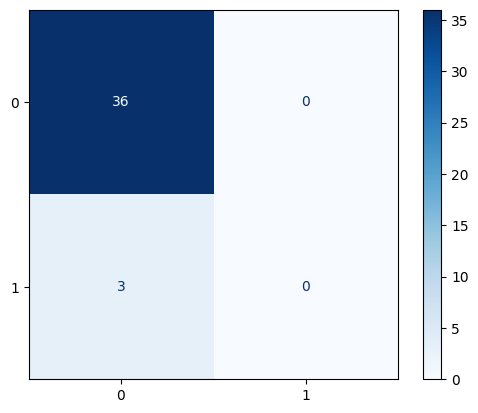

In [35]:
# import numpy as np
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# def evaluate_model(trainer, val_dataset):
#     predictions = trainer.predict(val_dataset)
#     preds = np.argmax(predictions.predictions, axis=1)
#     true_labels = predictions.label_ids
#     # Print unique labels and predictions to check for inconsistencies
#     print("Unique true labels:", np.unique(true_labels))
#     print("Unique predicted labels:", np.unique(preds))
#     return confusion_matrix(true_labels, preds)

# # Evaluate and plot confusion matrix
# conf_matrix = evaluate_model(trainer, val_dataset)

# # Adjust display labels based on the number of unique classes in the confusion matrix
# unique_labels = np.unique(np.concatenate((conf_matrix.ravel(), conf_matrix.ravel())))
# display_labels = [f'Class {i}' for i in unique_labels]

# disp = ConfusionMatrixDisplay(conf_matrix, display_labels=display_labels)
# disp.plot(cmap=plt.cm.Blues)
# plt.show()

<ipython-input-32-4e776a7dba43>:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (3).

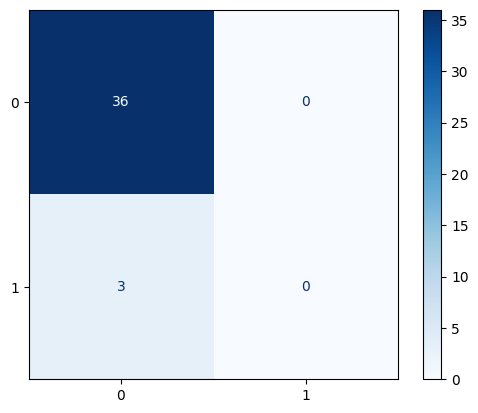

In [34]:
# import numpy as np
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# def evaluate_model(trainer, val_dataset):
#     predictions = trainer.predict(val_dataset)
#     preds = np.argmax(predictions.predictions, axis=1)
#     true_labels = predictions.label_ids
#     return confusion_matrix(true_labels, preds)

# # Evaluate and plot confusion matrix
# conf_matrix = evaluate_model(trainer, val_dataset)
# disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Class 0', 'Class 1', 'Class 2'])
# disp.plot(cmap=plt.cm.Blues)
# plt.show()


In [ ]:
from sklearn.metrics import classification_report

def compute_additional_metrics(trainer, val_dataset):
    predictions = trainer.predict(val_dataset)
    preds = np.argmax(predictions.predictions, axis=1)
    true_labels = predictions.label_ids
    return classification_report(true_labels, preds, target_names=['Class 0', 'Class 1', 'Class 2'])

report = compute_additional_metrics(trainer, val_dataset)
print(report)
